**PROJECT TITLE-** 'Save The Air'- Analysis of Air Pollution In India

**OBJECTIVE :**

To detect the quality of air by taking into account the the major pollutants causing pollution and inturn predicting the Air Quality Index.
To analyse the effect of lockdown on the air quality.
DATASET - city_day.csv

#  Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Reading dataset

In [2]:
air_data=pd.read_csv('/content/city_day.csv')

#1 Feature Description and Data Exploration

In [3]:
air_data.head()

City        Date  PM2.5  PM10  ...  Toluene  Xylene  AQI  AQI_Bucket
0  Ahmedabad  2015-01-01    NaN   NaN  ...     0.02    0.00  NaN         NaN
1  Ahmedabad  2015-01-02    NaN   NaN  ...     5.50    3.77  NaN         NaN
2  Ahmedabad  2015-01-03    NaN   NaN  ...    16.40    2.25  NaN         NaN
3  Ahmedabad  2015-01-04    NaN   NaN  ...    10.14    1.00  NaN         NaN
4  Ahmedabad  2015-01-05    NaN   NaN  ...    18.89    2.78  NaN         NaN

[5 rows x 16 columns]

In [4]:
air_data.tail()

City        Date  PM2.5  ...  Xylene   AQI    AQI_Bucket
29526  Visakhapatnam  2020-06-27  15.02  ...    0.73  41.0          Good
29527  Visakhapatnam  2020-06-28  24.38  ...    0.38  70.0  Satisfactory
29528  Visakhapatnam  2020-06-29  22.91  ...    0.00  68.0  Satisfactory
29529  Visakhapatnam  2020-06-30  16.64  ...    0.00  54.0  Satisfactory
29530  Visakhapatnam  2020-07-01  15.00  ...     NaN  50.0          Good

[5 rows x 16 columns]

In [5]:
air_data.shape

(29531, 16)

In [6]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
air_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [8]:
# No. of cities in the dataset
air_data['City'].nunique()

26

In [9]:
air_data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [10]:
#Identify the time period in date column of dataset
print("The available data is between",air_data['Date'].min(), 'and', air_data['Date'].max())

The available data is between 2015-01-01 and 2020-07-01


## 2 Data Preprocessing

Changing the datatype of Date column to datetime format

In [11]:
air_data['Date']=pd.to_datetime(air_data['Date'])
print("The available data is between",air_data['Date'].min(), 'and', air_data['Date'].max())

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [12]:
air_data.head()

City       Date  PM2.5  PM10  ...  Toluene  Xylene  AQI  AQI_Bucket
0  Ahmedabad 2015-01-01    NaN   NaN  ...     0.02    0.00  NaN         NaN
1  Ahmedabad 2015-01-02    NaN   NaN  ...     5.50    3.77  NaN         NaN
2  Ahmedabad 2015-01-03    NaN   NaN  ...    16.40    2.25  NaN         NaN
3  Ahmedabad 2015-01-04    NaN   NaN  ...    10.14    1.00  NaN         NaN
4  Ahmedabad 2015-01-05    NaN   NaN  ...    18.89    2.78  NaN         NaN

[5 rows x 16 columns]

#2.1 Handling Missing Values

In [13]:
#checking for missing values
air_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

The dataset contains datewise air quality data and AQI (Air Quality Index) across multiple cities in India.The dataset has a lot of missing values and and is a classic Time series problem. Hence we are making use of imputation techniques like 'ffill' or 'pad' that replaces NaN s with last observed value 'bfill' or 'backfill' that Replace NaN s with next observed value

In [14]:
air_data['AQI'][50:65]

50     588.0
51    1141.0
52     669.0
53    1247.0
54     411.0
55     292.0
56       NaN
57       NaN
58       NaN
59       NaN
60     189.0
61     408.0
62     383.0
63     780.0
64       NaN
Name: AQI, dtype: float64

In [15]:
#imputaion using forward fill
air_data.fillna(method='ffill',inplace=True)
air_data['AQI'][50:65]

50     588.0
51    1141.0
52     669.0
53    1247.0
54     411.0
55     292.0
56     292.0
57     292.0
58     292.0
59     292.0
60     189.0
61     408.0
62     383.0
63     780.0
64     780.0
Name: AQI, dtype: float64

In [16]:
air_data.isna().sum()

City             0
Date             0
PM2.5           27
PM10          1594
NO               0
NO2              0
NOx              0
NH3           2009
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI             28
AQI_Bucket      28
dtype: int64

In [17]:
air_data.fillna(method="bfill",inplace=True)


In [18]:
air_data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

# 2.2 Handling Outliers

In [19]:
air_data.corr()

PM2.5      PM10        NO  ...   Toluene    Xylene       AQI
PM2.5    1.000000  0.358048  0.358834  ...  0.128307 -0.028995  0.653749
PM10     0.358048  1.000000  0.350411  ...  0.133010  0.030741  0.393922
NO       0.358834  0.350411  1.000000  ...  0.126067  0.019073  0.368569
NO2      0.336787  0.317358  0.421061  ...  0.305538  0.102112  0.512593
NOx      0.276221  0.267689  0.612566  ...  0.142145 -0.020897  0.327661
NH3      0.110876  0.118249  0.110603  ...  0.054119 -0.008799  0.099749
CO       0.107734  0.106874  0.194540  ...  0.286003  0.115370  0.648115
SO2      0.135359  0.207046  0.133410  ...  0.195815  0.088904  0.408903
O3       0.166943  0.156062  0.028060  ...  0.146520  0.062756  0.195064
Benzene  0.026834  0.035672  0.026581  ...  0.632012  0.084402  0.043899
Toluene  0.128307  0.133010  0.126067  ...  1.000000  0.192025  0.284850
Xylene  -0.028995  0.030741  0.019073  ...  0.192025  1.000000  0.053391
AQI      0.653749  0.393922  0.368569  ...  0.284850  0.053391  1.000000

[13 rows x 13 columns]

After computing correlation of features, it is found that no features have a very high correlation with target variable AQI. So, outlier removal is done for the target variable, ie, AQI .

Text(0.5, 0, 'AQI')

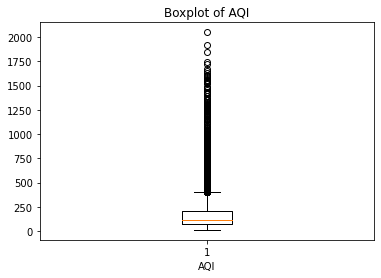

In [20]:
plt.boxplot(air_data['AQI'])
plt.title('Boxplot of AQI')
plt.xlabel('AQI')

In [21]:
Q1=np.percentile(air_data['AQI'],25,interpolation='midpoint')
Q2=np.percentile(air_data['AQI'],50,interpolation='midpoint')
Q3=np.percentile(air_data['AQI'],75,interpolation='midpoint')


In [22]:
print(Q1,Q2,Q3)

76.0 114.0 206.0


In [23]:
IQR=Q3-Q1

In [24]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+3*IQR

In [25]:
print(low_limit)
print(upper_limit)

-119.0
596.0


In [26]:
outlier=[]
for x in air_data['AQI']:
    if(x<low_limit or x>upper_limit):
        outlier.append(x)

In [27]:
outlier

[782.0,
 914.0,
 660.0,
 761.0,
 1141.0,
 669.0,
 1247.0,
 780.0,
 780.0,
 780.0,
 883.0,
 720.0,
 818.0,
 737.0,
 616.0,
 678.0,
 774.0,
 731.0,
 653.0,
 671.0,
 969.0,
 605.0,
 691.0,
 971.0,
 971.0,
 1842.0,
 776.0,
 805.0,
 705.0,
 740.0,
 751.0,
 798.0,
 721.0,
 1426.0,
 1348.0,
 1073.0,
 952.0,
 952.0,
 952.0,
 952.0,
 952.0,
 901.0,
 929.0,
 850.0,
 669.0,
 1141.0,
 707.0,
 1577.0,
 1747.0,
 1065.0,
 700.0,
 1043.0,
 1029.0,
 1041.0,
 1430.0,
 765.0,
 599.0,
 764.0,
 696.0,
 650.0,
 773.0,
 763.0,
 738.0,
 622.0,
 898.0,
 610.0,
 716.0,
 804.0,
 656.0,
 1201.0,
 1201.0,
 1155.0,
 1355.0,
 1367.0,
 795.0,
 1153.0,
 1414.0,
 1042.0,
 1613.0,
 692.0,
 620.0,
 617.0,
 856.0,
 1423.0,
 1917.0,
 802.0,
 1035.0,
 1477.0,
 2049.0,
 1314.0,
 1215.0,
 1483.0,
 1526.0,
 1526.0,
 1526.0,
 700.0,
 831.0,
 717.0,
 777.0,
 807.0,
 1171.0,
 1332.0,
 1260.0,
 708.0,
 1108.0,
 761.0,
 1274.0,
 1241.0,
 1210.0,
 862.0,
 889.0,
 1001.0,
 1156.0,
 691.0,
 965.0,
 1434.0,
 1034.0,
 740.0,
 856.0,
 65

In [28]:
indx1=air_data['AQI']>upper_limit
air_data.loc[indx1].index

Int64Index([   31,    32,    33,    44,    51,    52,    53,    63,    64,
               65,
            ...
            14257, 14730, 15110, 18326, 19925, 19926, 19927, 20523, 24078,
            24079],
           dtype='int64', length=341)

In [29]:
air_data.drop(air_data.loc[indx1].index,inplace=True)
air_data.shape

(29190, 16)

Text(0.5, 0, 'AQI')

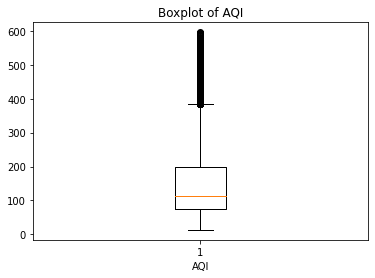

In [30]:
plt.boxplot(air_data['AQI'])
plt.title('Boxplot of AQI')
plt.xlabel('AQI')

#3 Data Visualisation

(i) Plotting histogram to check the distribution in numerical columns

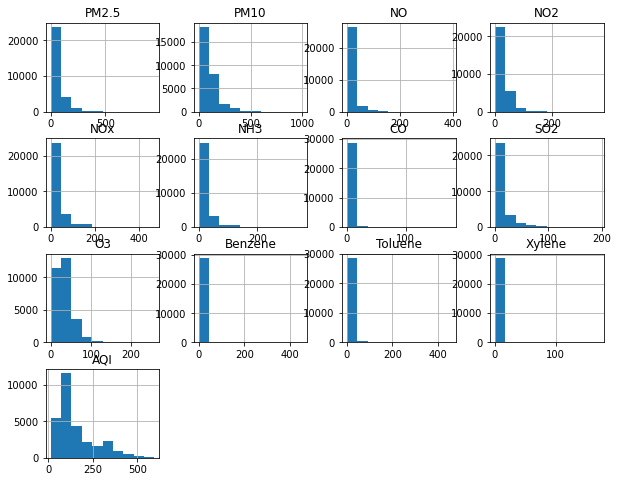

In [31]:
freq_graph=air_data.select_dtypes(include=['float'])
freq_graph.hist(figsize=(10,8))
plt.show()

Observation: There is skweness in several dataset features like PM2.5,PM10,NO etc.

Visualization of  ‘AQI & AQI-Bucket’: 

As per the Central Pollution Control Boards - Air Quality Standards, Air Quality Index(AQI) is grouped into six categories/ buckets.

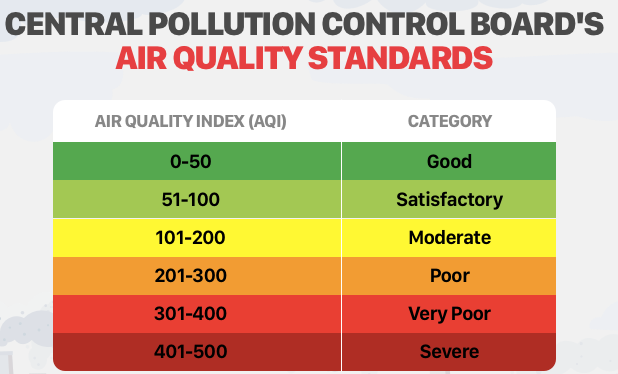

(ii) Visualizing the countwise distribution of AQI category


In [32]:
air_data.groupby(['City'])['AQI'].mean()

City
Ahmedabad             331.192778
Aizawl                 35.371681
Amaravati              91.778128
Amritsar              118.320197
Bengaluru              93.790941
Bhopal                129.200692
Brajrajnagar          145.627932
Chandigarh             96.105263
Chennai               112.503733
Coimbatore             72.955959
Delhi                 256.702851
Ernakulam              92.314815
Gurugram              220.371221
Guwahati              136.510000
Hyderabad             105.368762
Jaipur                132.808797
Jorapokhar            142.995719
Kochi                 103.691358
Kolkata               135.331695
Lucknow               208.911222
Mumbai                 87.637631
Patna                 228.789871
Shillong               52.951613
Talcher               157.393514
Thiruvananthapuram     74.510791
Visakhapatnam         118.522572
Name: AQI, dtype: float64

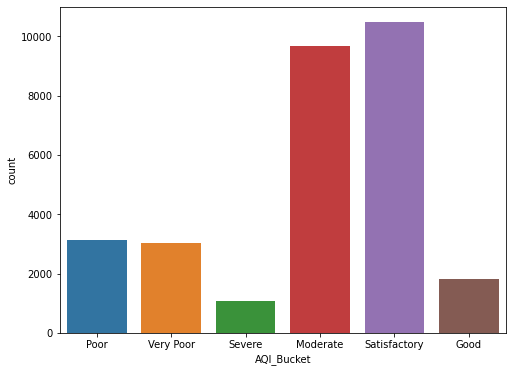

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(data=air_data,x='AQI_Bucket')

Observation:Most of the data are with Moderate and satisfactory AQI_Bucket or pollution level, only very few entries are related to severe pollution level

(iii) Visualizing City with mean AQI levels in a descending pattern** 

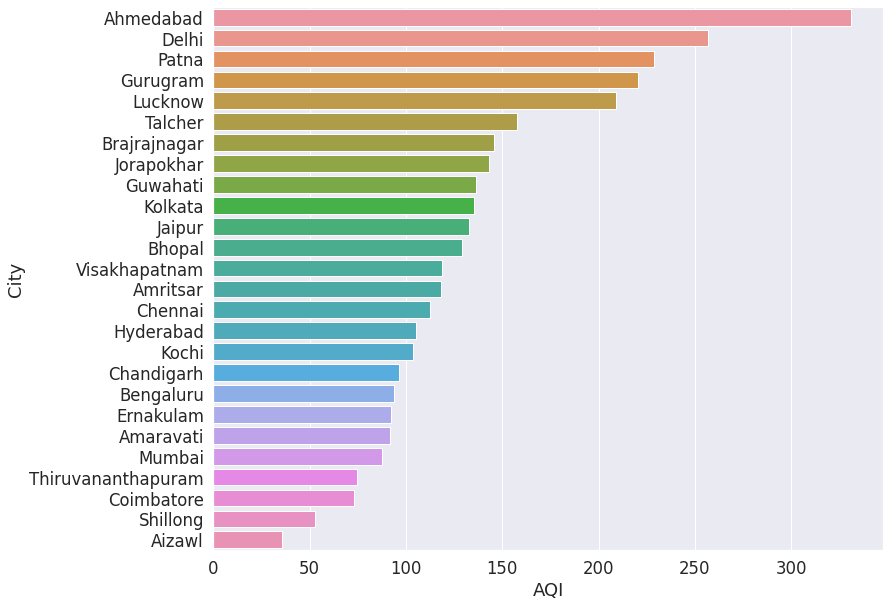

In [34]:
X=pd.DataFrame(air_data.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False))
X=X.reset_index('City')
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
sns.barplot(data=X,x='AQI',y='City')

Observation: Ahmedabad has the highest AQI, so it is the most populated cities. So visualisation can be done on cities like Ahmedabad, Patna, Delhi, Gurugran & Lucknow to know how covid effected in AQI 

(iv) Plotting the average AQI over the years (2015-2020) for the top 5 highly polluted cities.

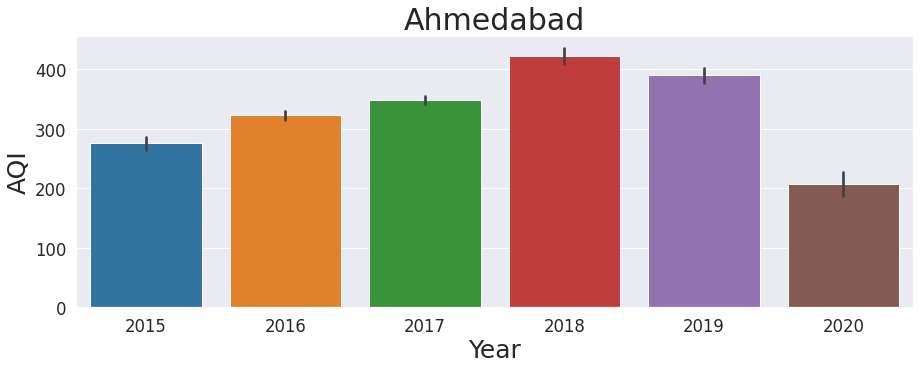

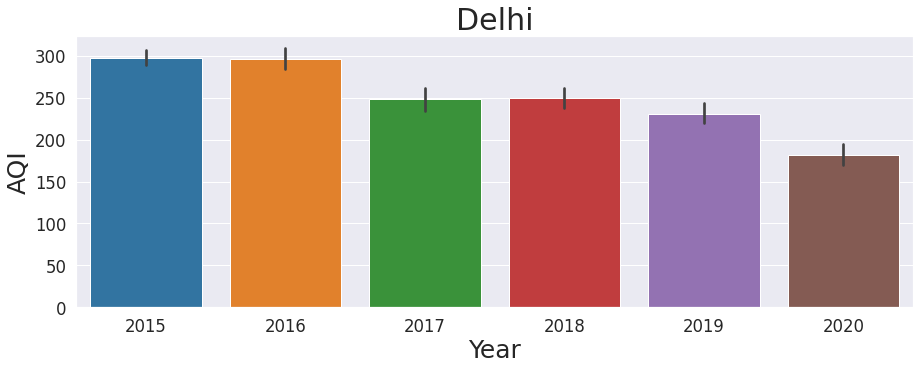

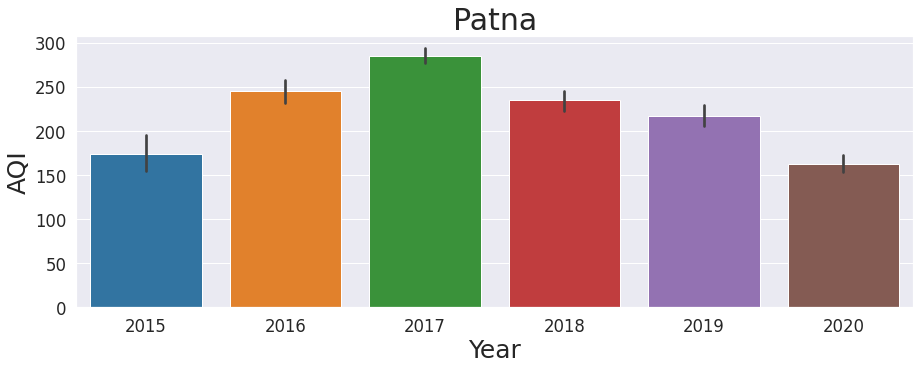

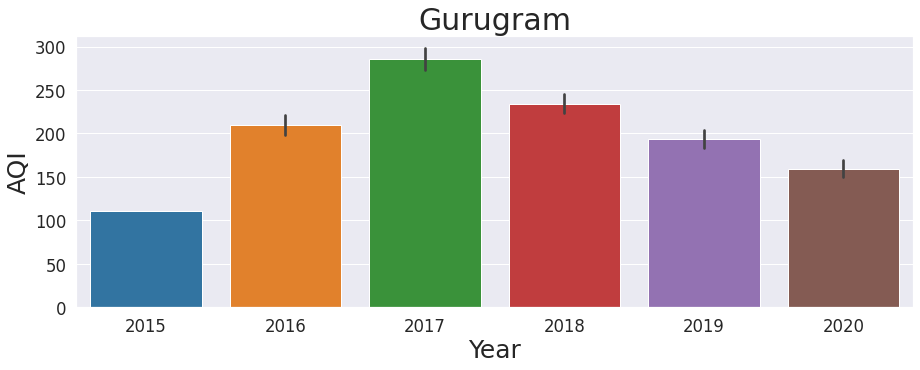

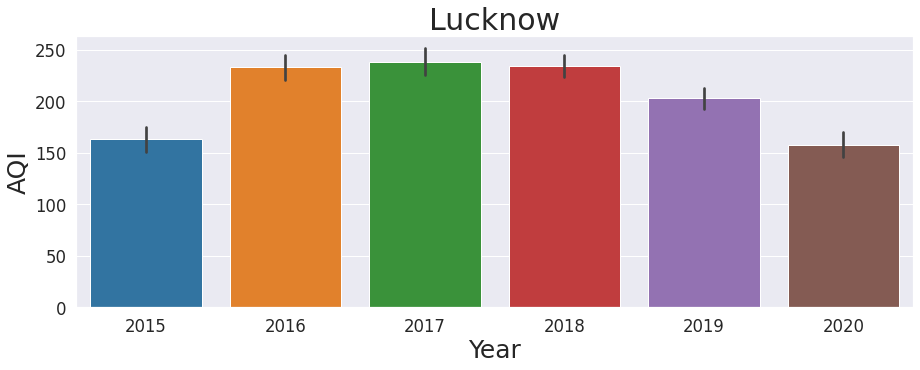

In [35]:
air_data['Year']=air_data.Date.dt.year.astype(str)
air_data['City'][air_data['AQI']>=500].value_counts()

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(15,5))
    #selecting data pertaining to the selected city
    x=air_data[air_data['City']==col]
    sns.set(font_scale=1.5)
    sns.barplot(x='Year',y='AQI',data=x,palette='tab10')
    plt.title(col,fontsize=30)
    plt.xlabel('Year',fontsize=25)
    plt.ylabel('AQI',fontsize=25)

Observation:

Here we could find that the pollution rate hit the maximum  during the year 2018 in  Ahmedabad. Similarly an  year-wise  analysis could be made for each of the cities. The  positive trend observed here is that the pollution levels have come down to moderate category towards 2020 in these cities.

In [36]:
most_polluted = air_data[['City', 'AQI', 'PM10','PM2.5', 'NO2','SO2','O3','NOx','CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

AQI        PM10  ...        NOx         CO
City                                        ...                      
Ahmedabad           331.192778  134.748567  ...  35.020239  12.614985
Delhi               256.702851  231.968764  ...  58.336493   1.973357
Patna               228.789871   23.162748  ...  44.604413   1.428685
Gurugram            220.371221  111.373712  ...  25.880786   1.244504
Lucknow             208.911222   31.580000  ...  23.428389   2.127072
Talcher             157.393514  150.263719  ...  29.943157   1.909243
Brajrajnagar        145.627932  121.502143  ...  24.093230   1.732186
Jorapokhar          142.995719  148.759332  ...  14.160000   0.625967
Guwahati            136.510000  114.975880  ...  44.304400   0.736600
Kolkata             135.331695  109.962715  ...  63.304939   0.799251
Jaipur              132.808797  122.926975  ...  37.273797   0.798097
Bhopal              129.200692  116.595225  ...  21.890242   0.864498
Visakhapatnam       118.522572  102.959911  ...  25.332059   0.738345
Amritsar            118.320197  116.030320  ...  29.374877   0.550320
Chennai             112.503733   73.015913  ...  17.488213   1.066874
Hyderabad           105.368762   85.701262  ...  19.446791   0.590040
Kochi               103.691358   67.335432  ...  68.412901   1.296667
Chandigarh           96.105263   85.656546  ...  15.230000   0.631349
Bengaluru            93.790941   85.593798  ...  19.687372   1.841095
Ernakulam            92.314815   48.180309  ...  24.569012   1.631049
Amaravati            91.778128   73.642482  ...  15.252734   0.600673
Mumbai               87.637631   56.623395  ...  77.661473   0.576794
Thiruvananthapuram   74.510791   52.190791  ...   8.124991   0.947851
Coimbatore           72.955959   37.821528  ...  30.785000   0.946062
Shillong             52.951613   38.895355  ...   1.038903   0.246903
Aizawl               35.371681   23.200973  ...  12.610354   0.283628

[26 rows x 8 columns]

Here the severity of pollutants can be identified by comparing the range & category of pollutants  keeping the table below as reference. Eg: The major pollutant affecting Ahmedabad is PM2.5 that falls under the poor category as per the standards. We could also conclude that the cause of pollution in this case  is vehicular pollution..

(v) Line plot analysis for the amount of particulate matters and gasses over the years.

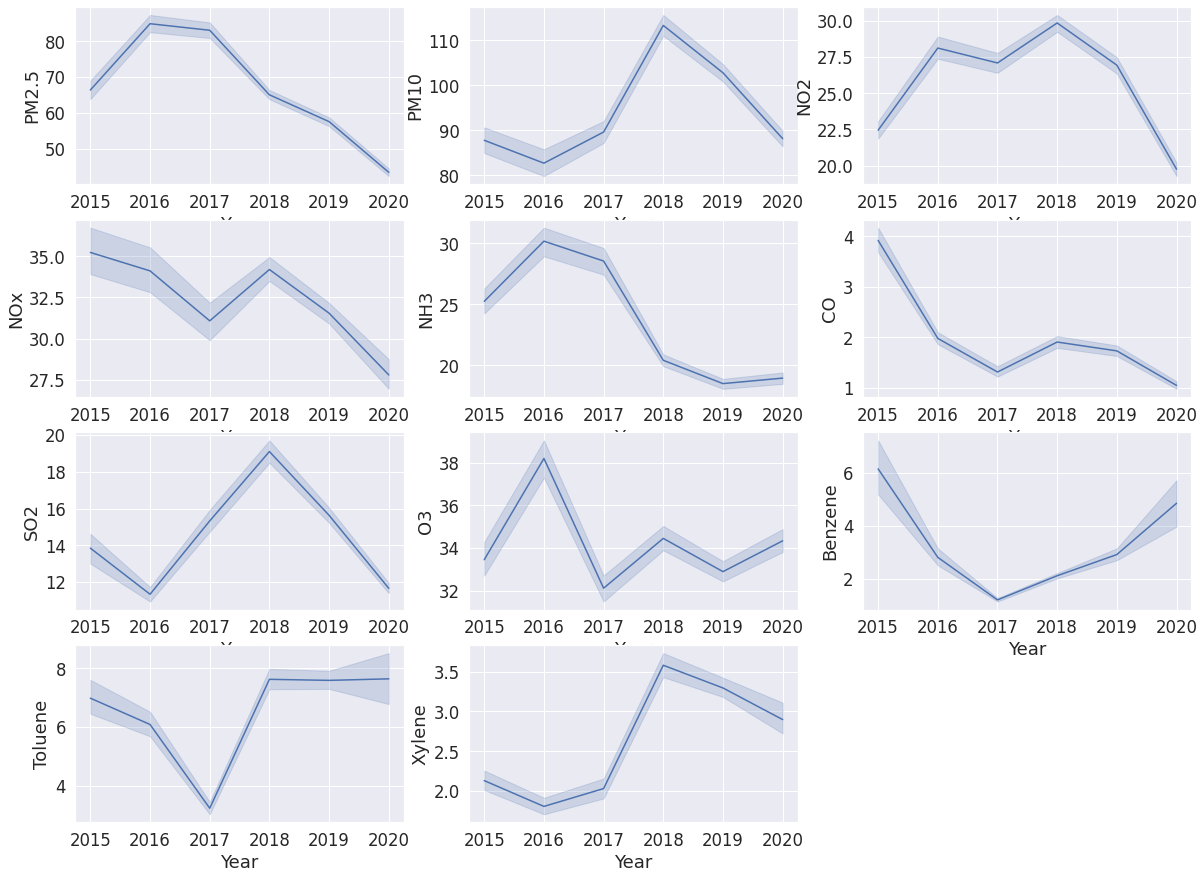

In [37]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3', 'Benzene', 'Toluene', 'Xylene']
data_1=air_data
data_1['Year']=data_1.Date.dt.year.astype(str)
x=data_1.iloc[:,2:]
fig=plt.figure(figsize=(20,15))
for i,col  in enumerate(cols):
    fig.add_subplot(4,3,i+1)
    sns.lineplot(x='Year',y=col,data=x)

Observation: The line graphs can reveal the trend in the level of pollutants over the years(2015-2020). There are considerable drop of pollutants like PM2.5, PM10,NOx and SO2 towards the year 2020.

#Tableau Visualizations

#(i) Visualisation of average AQI of 5 polluted cities between 2015-2020

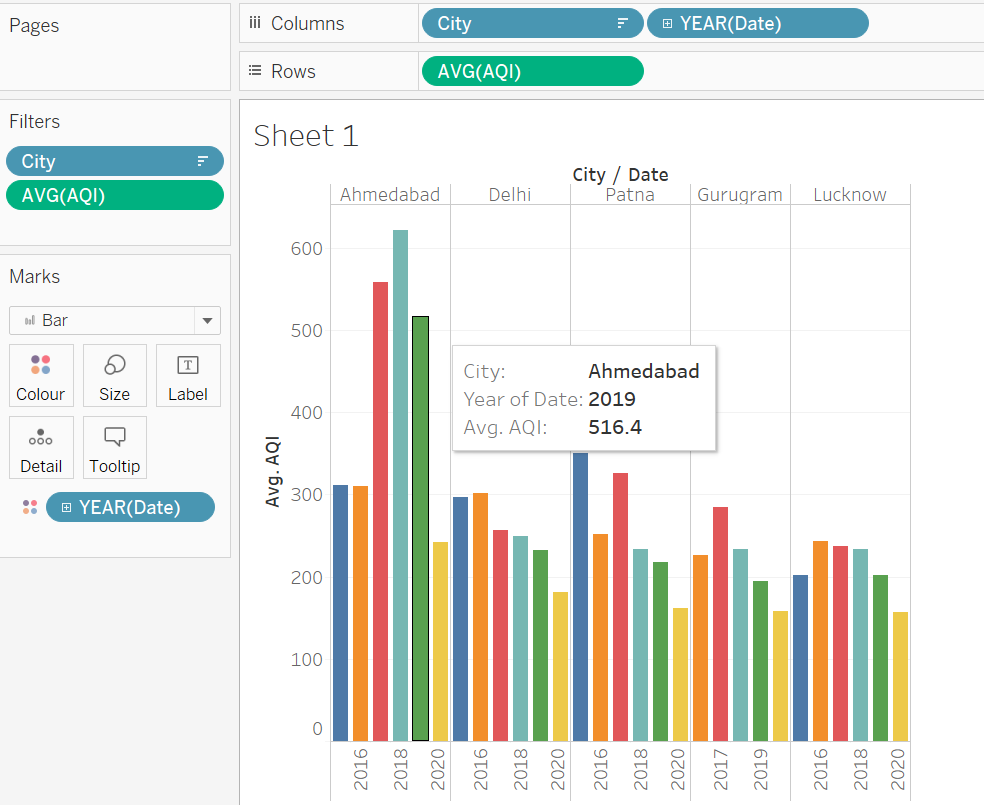

# (ii) Visualisation of average AQI of 5 polluted cities before lockdown or between 01-01-2015 to 25-03-2020

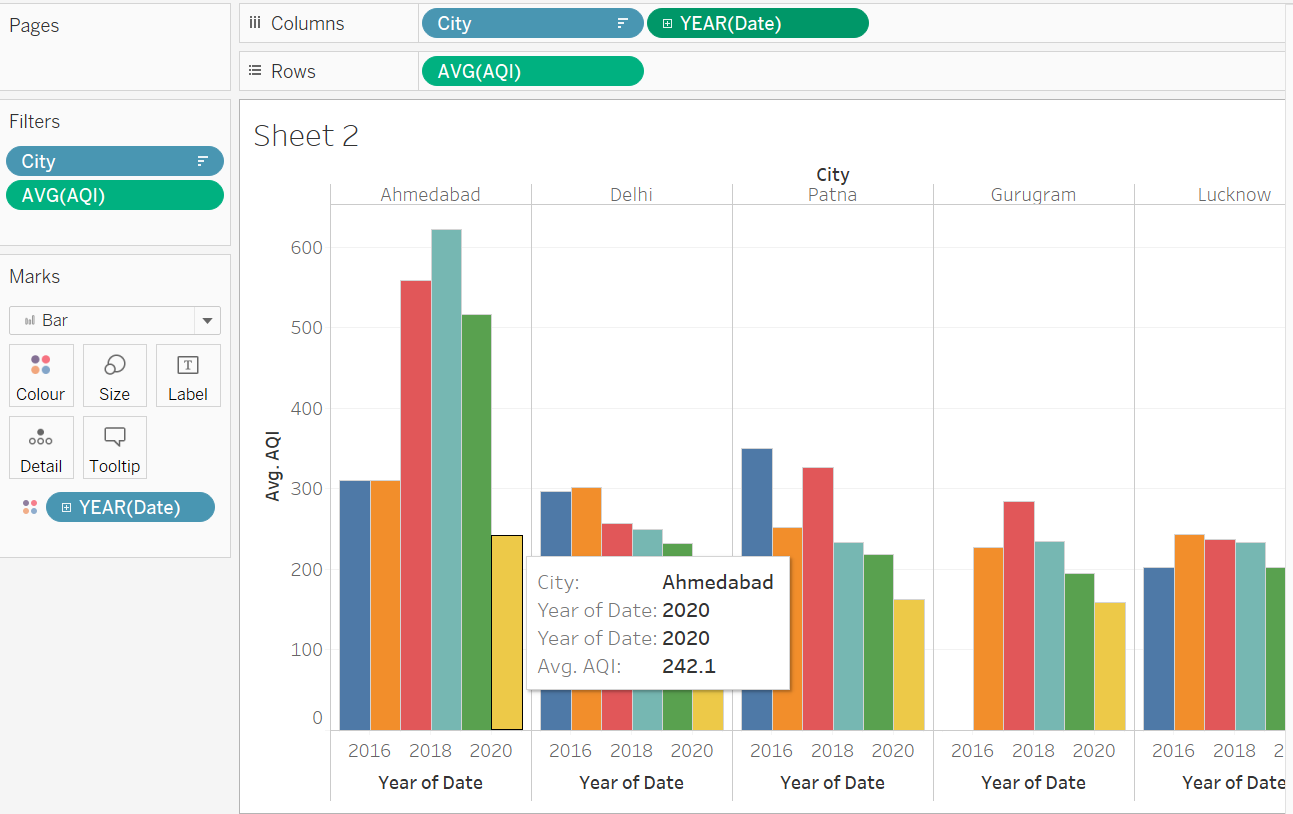

#(iii) Visualisation of average AQI of 5 polluted cities After lockdown in 2020 between 01-03-2015 to 01-07-2020

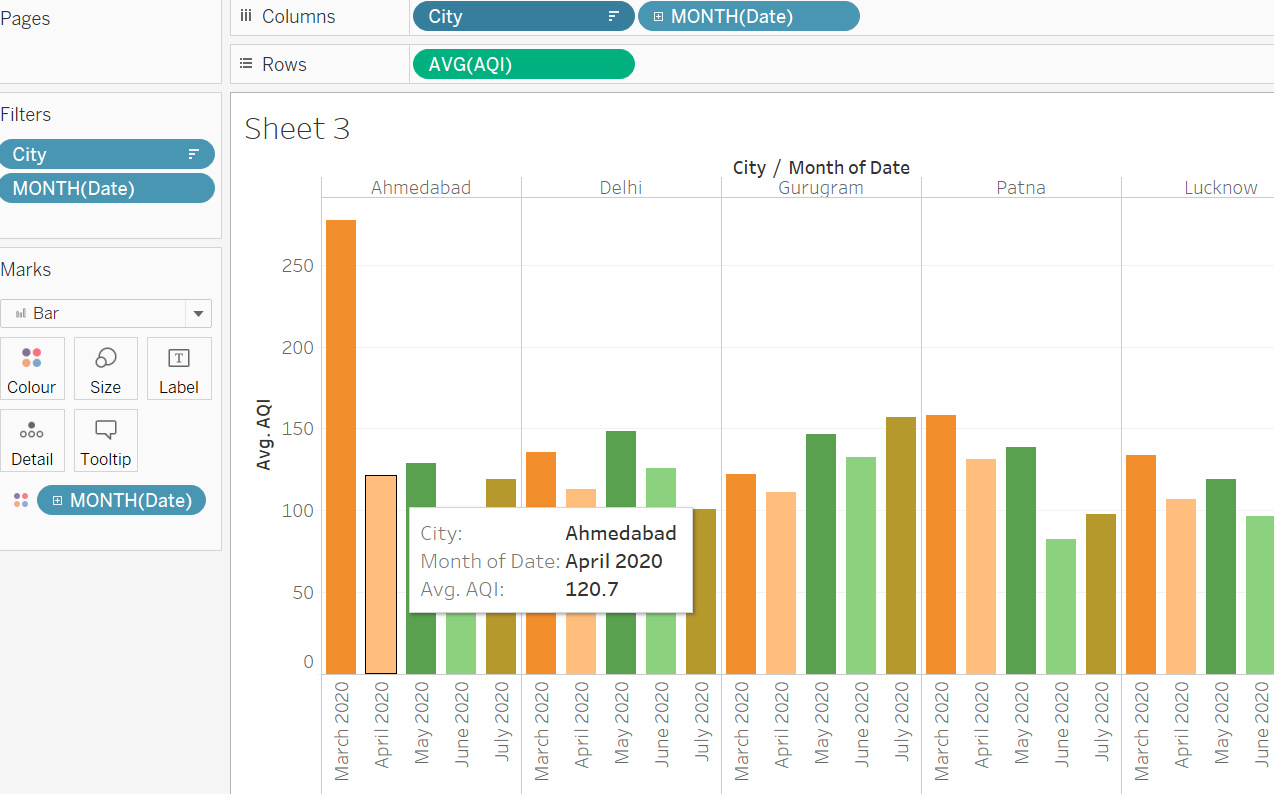

Observation: From the above 3 visualization, we can see a drop in AQI even in highly polluted city Ahmedabad and also in moderately polluted cities like Patna, Delhi, Gurugram, Lucknow. 

(iv)Citywise comparison of AQI(mean) - Before lockdown vs During Lockdown

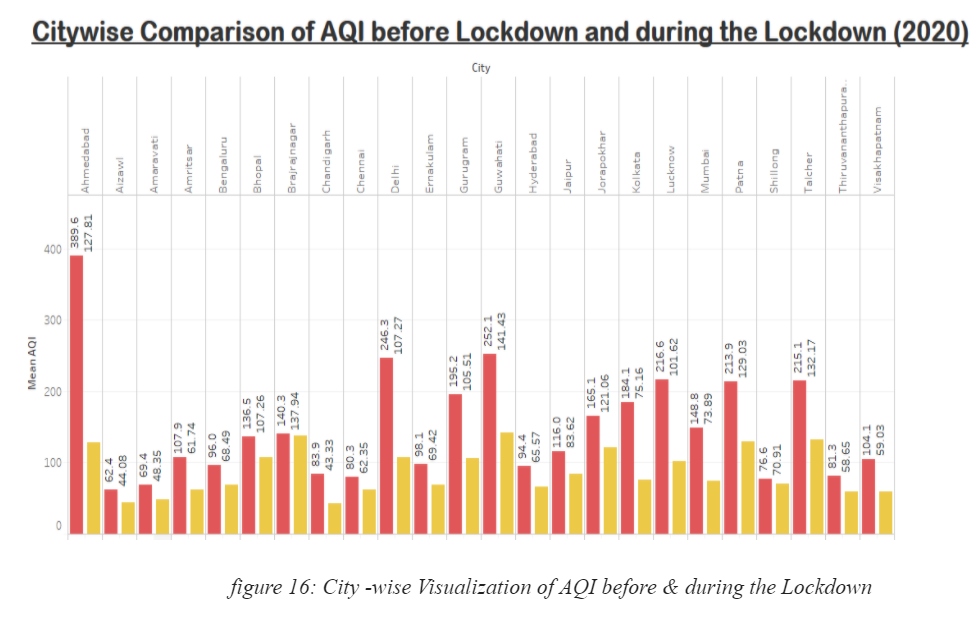

Obsevation: The mean AQI levels have dropped considerably during the Lockdown period(20-03-2020 to 01-05-2020).

(ii) Visualising the effect of lockdown with Geographical Plotting.

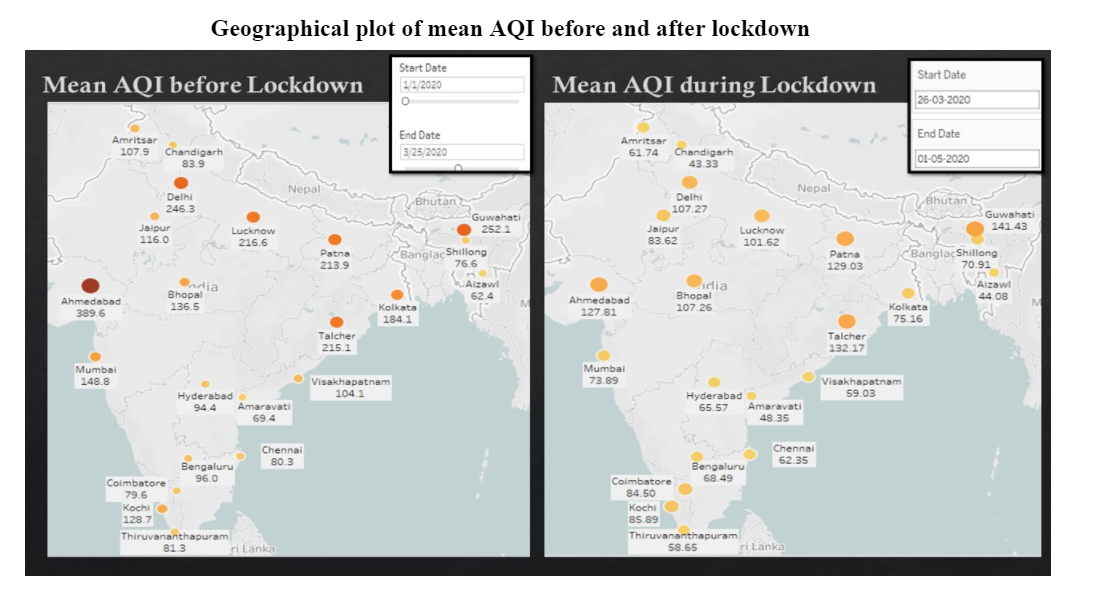

(iii) Visualising the variation in AQI levels as a result of Lockdown

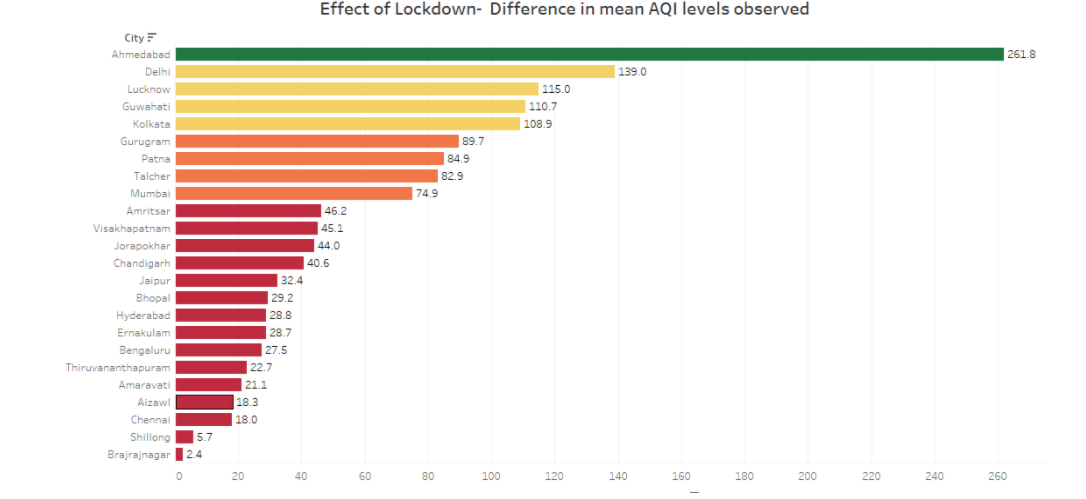

**4 Feature Engineering**

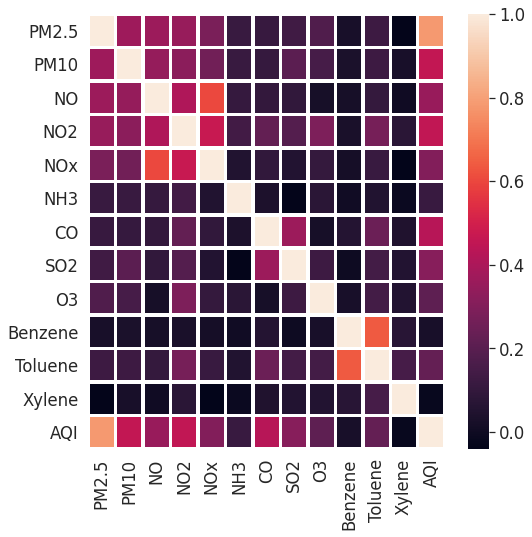

In [38]:
corr = air_data.corr()
fig= plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=False, linewidth=2.5)

Observation:
In the data visualization using heatmap, it is seen Benzene, toluene, xylene has low correlation to target variable AQI, these are combined to single column, as BTX

In [39]:
air_data['BTX'] = air_data['Benzene']+air_data['Toluene']+air_data['Xylene']


In [40]:
data=air_data.drop(['Benzene','Toluene','Xylene','Year'],axis=1)


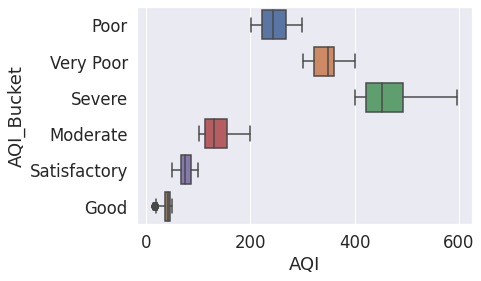

In [41]:
sns.boxplot(x='AQI',y='AQI_Bucket',data=data)

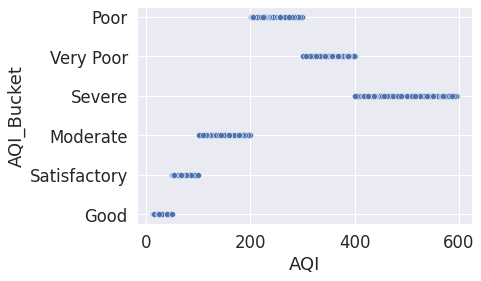

In [42]:
sns.scatterplot(x='AQI',y='AQI_Bucket',data=data)

Observation: The AQI_BUcket feature is purely based on AQI, so for modelling, we don't need the feature AQI_Bucket

In [43]:
data=data.drop(['AQI_Bucket'],axis=1)

In [44]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI', 'BTX'],
      dtype='object')

In [45]:
data.shape

(29190, 13)

**5 Encoding**

The majority are numerical columns in the dataset. The columns City and date are label encoded before building the model.

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in data[['City', 'Date']]:
          data[i]= label_encoder.fit_transform(data[i])

In [47]:
data.head()

City  Date  PM2.5    PM10     NO  ...     CO    SO2      O3    AQI    BTX
0     0     0  73.24  141.54   0.92  ...   0.92  27.64  133.36  209.0   0.02
1     0     1  73.24  141.54   0.97  ...   0.97  24.55   34.06  209.0  12.95
2     0     2  73.24  141.54  17.40  ...  17.40  29.07   30.70  209.0  25.45
3     0     3  73.24  141.54   1.70  ...   1.70  18.59   36.08  209.0  15.57
4     0     4  73.24  141.54  22.10  ...  22.10  39.33   39.31  209.0  28.68

[5 rows x 13 columns]

Standardisation of data

In [48]:
data.describe()

City          Date  ...           AQI           BTX
count  29190.000000  29190.000000  ...  29190.000000  29190.000000
mean      13.018705   1229.795615  ...    154.212196     12.552856
std        7.518839    549.430191  ...    108.805845     31.232785
min        0.000000      0.000000  ...     13.000000      0.000000
25%        7.000000    834.000000  ...     76.000000      2.140000
50%       14.000000   1312.000000  ...    113.000000      6.100000
75%       20.000000   1708.000000  ...    199.000000     12.997500
max       25.000000   2008.000000  ...    596.000000    911.840000

[8 rows x 13 columns]

The dataset need no standardisation beacause they are given to regression models

**6 Splitting Dataset**

In [49]:
X=data.drop(['AQI'],axis=1)
y=data['AQI']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [51]:
x_train.shape

(23352, 12)

In [52]:
x_test.shape

(5838, 12)

**7 Model Building**

i. Multiple Regression

In [53]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()
lmodel.fit(x_train,y_train)
y_pred=lmodel.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))


Mean Squared Error 2667.1400921442983
R2 score 0.7752498326903555


ii Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42,max_depth=15)

In [57]:
rf.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [58]:
y_pred=rf.predict(x_test)

In [59]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))


Mean Squared Error 957.6512097547812
R2 score 0.9193022255371557


iii Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [61]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Mean Squared Error 1860.460945529291
R2 score 0.8432257420551926


iv AdaBoost Regression

In [62]:
from sklearn.ensemble import AdaBoostRegressor
Ada_model=AdaBoostRegressor()
Ada_model.fit(x_train,y_train)
y_pred=Ada_model.predict(x_test)

In [63]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Mean Squared Error 4912.496845030456
R2 score 0.5860418089471087


v Gradient Boost Regression

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [65]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Mean Squared Error 1145.8277497343727
R2 score 0.9034452748772595


Result: Random forest regressor works well among all the models. It predict the AQI wirh R2 score of 0.919 and MSE of 957.65

Next aim is to improve the score of Random forest regressor, then select features for the model. This is done by applying feature importance & hypertuning of parameters.

Feature Importance and Feature Selection

In [66]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

PM2.5    70.850211
City      9.685495
CO        8.052034
PM10      4.084965
Date      1.958369
O3        1.036858
NO        0.922508
SO2       0.756124
NOx       0.720387
BTX       0.719666
NO2       0.665654
NH3       0.547729
dtype: float64

In [67]:
X1=X.drop(['BTX','NO2','NH3'],axis=1) # X features except last 3 based on importance
 
Features=['PM2.5','PM10','CO','O3','NO2','SO2','NH3','NOx']#Only Major pollutants are considered as X
X2=data[Features]
y=data['AQI']

In [68]:
X1.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NOx', 'CO', 'SO2', 'O3'], dtype='object')

In [69]:
X2.columns

Index(['PM2.5', 'PM10', 'CO', 'O3', 'NO2', 'SO2', 'NH3', 'NOx'], dtype='object')

In [70]:
x_train1,x_test1,y_train,y_test=train_test_split(X1,y,random_state=42,test_size=0.2)
x_train2,x_test2,y_train,y_test=train_test_split(X2,y,random_state=42,test_size=0.2)

Hypertuning of parametrs in Random Forest Regressor 

In [71]:
from sklearn.ensemble import RandomForestRegressor
rft=RandomForestRegressor(n_estimators=70,random_state=42,max_depth=20)

In [72]:
#Model trained considering X1 features
rft.fit(x_train1,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [73]:
y_pred=rft.predict(x_test1)

In [74]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Mean Squared Error 967.804986961495
R2 score 0.9184466037673223


In [75]:
#Model trained considering X2 features 'PM2.5','PM10','CO','O3','NO2','SO2','NH3','NOx'
rft=RandomForestRegressor(n_estimators=70,random_state=42,max_depth=20)
rft.fit(x_train2,y_train)
y_pred=rft.predict(x_test2)


In [76]:
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))

Mean Squared Error 1014.6554611570834
R2 score 0.9144986851915384


Observation: We see hypertuning X features based on feature importance caused a slight decrease in MSE & R2score of Random Forest Regressor. This may be beacuase the dataset is highly imbalanced. Also, most columns for pollutants had a lot of missing values.

#Conclusion

As a first step in the analysis process, all the necessary data preprocessing steps like handling missing values, handling outliers in the AQI, and encoding  are done. <br>
After  performing the data visualization step both using python and tableau,  we could see a considerable drop in AQI even in highly polluted city Ahmedabad and also in moderately polluted cities like Patna, Delhi, Gurugram, Lucknow. So it can be stated that  the reason for this drop in AQI is the lockdown implemented in the month of March 2020 due to Covid-19.<br>
Secondly, We performed feature engineering, which resulted in combining features like Benzene, Toluene, Xylene into a single column and dropping the individual columns. Also, the feature ‘AQI_Bucket’ is removed. 
Then, after trying out various regression machine learning models, Random Forest gave better performance in predicting the AQI with a MSE=957.65, R2 Score=0.915. <br>The next aim was to improve the scores of this model. This was done by selecting features based on feature importance, and hypertuning some of the parameters. <br>
 Since, it is known that in India, the AQI prediction is done based on major pollutants. So, for building AQI predictor Web Application, we considered 8 major pollutants: 
'PM2.5', 'PM10', 'CO', 'O3', 'NO2', 'SO2', 'NOx','NH3'. The model will predict the AQI with R2 score of 0.914 and MSE of 1014.65